<a href="https://colab.research.google.com/github/nandhukumar86/GL-hackathons-1/blob/main/Level0Predictions_Stackings_Nandha_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
 
import os

In [11]:
fd_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/frequency_domain_features_train.csv')
fd_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/frequency_domain_features_test.csv')
td_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/time_domain_features_train.csv')
td_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/time_domain_features_test.csv')
hr_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/heart_rate_non_linear_features_train.csv')
hr_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/heart_rate_non_linear_features_test.csv')

In [12]:
df3 = pd.merge(fd_train, td_train, how='outer', on='uuid')
df_train = pd.merge(df3, hr_train, how='outer', on='uuid')
 
df2 = pd.merge(fd_test, td_test, how='outer', on='uuid')
df_test = pd.merge(df2, hr_test, how='outer', on='uuid')

In [13]:
X_train = df_train.copy(deep = True)
X_test = df_test.copy(deep = True)
y_train = X_train.pop('HR')

In [14]:
X_train.drop(columns= ['datasetId'], inplace=True)
X_test.drop(columns= ['datasetId'], inplace=True)
X_train.drop(columns= ['uuid'], inplace=True)
y_id = X_test.pop('uuid')
X_train.drop(columns= ['SKEW_REL_RR','KURT_REL_RR'], inplace=True)
X_test.drop(columns= ['SKEW_REL_RR','KURT_REL_RR'], inplace=True)
X_train.drop(columns= ['SDSD_REL_RR'], inplace=True) 
X_test.drop(columns= ['SDSD_REL_RR'], inplace=True)

In [7]:
X_train.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'SD1', 'SD2', 'sampen', 'higuci', 'condition'],
      dtype='object')

In [8]:
X_train['VLF_t'] = X_train['VLF']/(0.04-0.0033)
X_train['LF_t'] = X_train['LF']/(0.15-0.04)
X_train['HF_t'] = X_train['HF']/(0.4-0.15)

X_test['VLF_t'] = X_test['VLF']/(0.04-0.0033)
X_test['LF_t'] = X_test['LF']/(0.15-0.04)
X_test['HF_t'] = X_test['HF']/(0.4-0.15)


In [9]:
X_test[X_test['KURT']>3]

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,SD1,SD2,sampen,higuci,condition,VLF_t,LF_t,HF_t
15,2853.918080,79.699285,643.217856,17.962675,88.482967,83.721888,2.338040,11.517033,3580.857825,7.682792,0.130161,736.759900,723.838380,119.982161,14.016755,14.016711,8.559910,6.400000,0.600000,6.054456,2.022711,-0.000060,0.000381,0.020429,0.013110,1.558235,9.914619,169.390491,1.733126,1.209946,no stress,77763.435417,5847.435058,334.887554
19,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,15.733333,3.533333,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,1.742060,14.578861,419.433484,1.695327,1.154370,interruption,195204.076894,11369.053494,472.056513
33,3814.072675,67.023250,1858.012032,32.650140,99.009575,18.586291,0.326610,0.990425,5690.670997,99.966802,0.010003,990.326028,988.122720,178.813038,22.252692,22.241796,8.035569,20.933333,4.000000,4.417980,1.207575,0.000512,-0.000266,0.023283,0.011345,2.052329,15.732574,252.389958,2.071964,1.165748,time pressure,103925.685973,16891.018470,74.345162
61,1791.883651,72.220167,678.946549,27.364295,98.504172,10.310092,0.415538,1.495828,2481.140292,65.852618,0.015185,853.712877,843.872970,101.922021,12.916298,12.915606,7.890962,5.933333,1.266667,3.630952,-0.235943,0.000132,0.000063,0.015907,0.006681,2.381049,9.135760,143.849695,1.771525,1.153035,no stress,48825.167598,6172.241352,41.240368
66,3610.616315,81.916037,746.846482,16.944117,93.696923,50.241037,1.139846,6.303077,4407.703834,14.865268,0.067271,654.057867,606.314575,210.941748,12.400652,12.370545,17.010537,4.200000,1.200000,20.381821,4.567437,0.000764,-0.000015,0.017475,0.009776,1.787563,8.750216,298.188323,0.563330,1.199398,no stress,98381.915930,6789.513476,200.964149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40977,4169.432542,84.816068,702.393644,14.288339,94.101709,44.026005,0.895593,5.898291,4915.852191,15.954063,0.062680,826.872415,829.477250,115.956923,15.048662,15.048157,7.705464,6.066667,1.133333,5.911970,0.788227,0.000167,-0.000491,0.018837,0.011013,1.710483,10.644205,163.642038,1.665355,1.258397,time pressure,113608.516122,6385.396767,176.104019
40978,1214.833621,52.536319,1027.512253,44.435477,93.619957,70.023232,3.028203,6.380043,2312.369106,14.673876,0.068148,739.156564,758.186360,84.412367,14.114121,14.113997,5.980703,6.800000,0.866667,6.813410,-2.120601,0.000082,-0.001339,0.022737,0.012613,1.802605,9.983434,118.958928,1.768220,1.219917,no stress,33101.733550,9341.020480,280.092927
40988,2228.240116,75.205306,656.259818,22.149417,89.331280,78.376267,2.645276,10.668720,2962.876201,8.373196,0.119429,715.242813,715.616570,70.000857,13.665571,13.665440,5.122425,6.800000,0.666667,9.852875,1.684353,0.000084,-0.000159,0.019383,0.011831,1.638275,9.666150,98.523122,1.866529,1.230656,no stress,60714.989543,5965.998346,313.505068
41029,1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,12.050447,0.082984,614.675733,595.120315,71.051513,8.695831,8.695537,8.170756,1.866667,0.200000,6.540759,2.438418,-0.000113,-0.000139,0.013108,0.007507,1.746077,6.150725,100.293588,1.569003,1.195527,no stress,36397.098368,3434.775814,125.414551


In [10]:
X_train['KURT_Normal'] = (X_train['KURT']<=3) & (X_train['KURT']>=-3)
X_test['KURT_Normal'] = (X_test['KURT']<=3) & (X_test['KURT']>=-3)

In [11]:
X_test['KURT_Normal'].value_counts()

True     38611
False     2422
Name: KURT_Normal, dtype: int64

In [12]:
def skewness(x):
  if (x<=-1) | (x>=1):
    return 0
  elif ((-1<=x) & (x<=-0.5)) | ((0.5<=x) & (x<=1)):
    return 1
  else:
    return 2

In [13]:
X_train['SKEW_cat'] = X_train['SKEW'].map(skewness)
X_test['SKEW_cat'] = X_test['SKEW'].map(skewness)

In [14]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
X_train['condition'] = lEncoder.fit_transform(X_train['condition'])
X_test['condition'] = lEncoder.transform(X_test['condition'])


In [15]:
X_train.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,SD1,SD2,sampen,higuci,condition,VLF_t,LF_t,HF_t,KURT_Normal,SKEW_cat
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,2.143342,11.001565,199.061782,2.139754,1.163485,1,72531.175358,9174.994718,62.090410,True,2
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,2.930855,9.170129,114.634458,2.174499,1.084711,0,63059.004096,6273.757044,8.434102,True,2
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,2.127053,11.533417,118.939253,2.135350,1.176315,0,37435.616134,11802.023812,55.078918,True,1
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,2.050988,11.119476,127.318597,2.178341,1.179688,1,65677.313564,9145.287811,72.727654,True,2
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,1.816544,13.590641,87.718281,2.221121,1.249612,1,31367.229703,12925.291377,192.863290,True,2


In [16]:
X_train['MEAN_RR_inv'] = 1/X_train['MEAN_RR']
X_test['MEAN_RR_inv'] = 1/X_test['MEAN_RR']

X_train['MEDIAN_RR_inv'] = 1/X_train['MEDIAN_RR']
X_test['MEDIAN_RR_inv'] = 1/X_test['MEDIAN_RR']

In [17]:
X_train['SDRR_inv'] = 1/X_train['SDRR']
X_test['SDRR_inv'] = 1/X_test['SDRR']

X_train['RMSSD_inv'] = 1/X_train['RMSSD']
X_test['RMSSD_inv'] = 1/X_test['RMSSD']


X_train['SDSD_inv'] = 1/X_train['SDSD']
X_test['SDSD_inv'] = 1/X_test['SDSD']

X_train['SDRR_RMSSD_inv'] = 1/X_train['SDRR_RMSSD']
X_test['SDRR_RMSSD_inv'] = 1/X_test['SDRR_RMSSD']

In [18]:
X_train['MEAN_REL_RR_inv'] = 1/X_train['MEAN_REL_RR']
X_test['MEAN_REL_RR_inv'] = 1/X_test['MEAN_REL_RR']

X_train['MEDIAN_REL_RR_inv'] = 1/X_train['MEDIAN_REL_RR']
X_test['MEDIAN_REL_RR_inv'] = 1/X_test['MEDIAN_REL_RR']

In [19]:
X_train['SDRR_REL_RR_inv'] = 1/X_train['SDRR_REL_RR']
X_test['SDRR_REL_RR_inv'] = 1/X_test['SDRR_REL_RR']

X_train['RMSSD_REL_RR_inv'] = 1/X_train['RMSSD_REL_RR']
X_test['RMSSD_REL_RR_inv'] = 1/X_test['RMSSD_REL_RR']

In [20]:
X_train['SDRR_RMSSD_REL_RR_inv'] = 1/X_train['SDRR_RMSSD_REL_RR']
X_test['SDRR_RMSSD_REL_RR_inv'] = 1/X_test['SDRR_RMSSD_REL_RR']

In [21]:
X_train['sampen_1'] = np.exp(X_train['sampen'])
X_train['sampen_2'] = np.exp(1/X_train['sampen'])

X_test['sampen_1'] = np.exp(X_test['sampen'])
X_test['sampen_2'] = np.exp(1/X_test['sampen'])

In [22]:
X_train.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,SD1,SD2,sampen,higuci,condition,VLF_t,LF_t,HF_t,KURT_Normal,SKEW_cat,MEAN_RR_inv,MEDIAN_RR_inv,SDRR_inv,RMSSD_inv,SDSD_inv,SDRR_RMSSD_inv,MEAN_REL_RR_inv,MEDIAN_REL_RR_inv,SDRR_REL_RR_inv,RMSSD_REL_RR_inv,SDRR_RMSSD_REL_RR_inv,sampen_1,sampen_2
0,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,2.143342,11.001565,199.061782,2.139754,1.163485,1,72531.175358,9174.994718,62.090410,True,2,0.001130,0.001171,0.007094,0.064290,0.064295,0.110337,-4926.450040,-5579.649702,58.548184,125.488778,0.466561,8.497347,1.595749
1,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,2.930855,9.170129,114.634458,2.174499,1.084711,0,63059.004096,6273.757044,8.434102,True,2,0.001064,0.001054,0.012297,0.077134,0.077136,0.159429,-16998.079555,1637.317371,71.543464,209.683506,0.341197,8.797774,1.583878
2,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,2.127053,11.533417,118.939253,2.135350,1.176315,0,37435.616134,11802.023812,55.078918,True,1,0.001113,0.001103,0.011835,0.061330,0.061330,0.192968,-91646.277930,-3805.195927,53.940589,114.734511,0.470134,8.460005,1.597288
3,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,2.050988,11.119476,127.318597,2.178341,1.179688,1,65677.313564,9145.287811,72.727654,True,2,0.001134,0.001119,0.011066,0.063611,0.063613,0.173956,8947.576035,2026.233817,56.302890,115.476549,0.487570,8.831639,1.582594
4,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,1.816544,13.590641,87.718281,2.221121,1.249612,1,31367.229703,12925.291377,192.863290,True,2,0.001235,0.001233,0.015932,0.052046,0.052046,0.306117,-10037.734592,-365.495707,42.166530,76.597343,0.550496,9.217657,1.568662


In [23]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

# model = ExtraTreesRegressor(n_estimators = 100, random_state=1, bootstrap = False)
model = SVR(tol = 1)

model.fit(X_train_pt, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)

In [25]:
y_test_predict = model.predict(X_test_pt)
y_train_predict = model.predict(X_train_pt)


In [28]:
svm_test = y_test_predict
svm_train = y_train_predict

In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, svm_train))

0.15668269577616703


In [34]:
svm = [svm_train, svm_test]

In [43]:
import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/svm.pickle','wb')
pickle.dump(svm, f)

f.close()

In [2]:
import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/svm.pickle','rb')
svm = pickle.load(f)

f.close()

In [ ]:
# df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
# df.columns = ['uuid','HR']
# df.to_csv('Submission.csv', index=False)

In [42]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

model = ExtraTreesRegressor(n_estimators = 100, random_state=1)

model.fit(X_train_pt, y_train)

etr_test = model.predict(X_test_pt)
etr_train = model.predict(X_train_pt)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, etr_train))

3.539600601260916e-05


In [27]:
# df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
# df.columns = ['uuid','HR']
# df.to_csv('Submission.csv', index=False)

In [44]:
etr = [etr_train, etr_test]

import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/etr.pickle','wb')
pickle.dump(etr, f)

f.close()

In [3]:
import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/etr.pickle','rb')
etr = pickle.load(f)

f.close()

In [45]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

model = RandomForestRegressor(n_estimators = 100, random_state=1)

model.fit(X_train_pt, y_train)

rfr_test = model.predict(X_test_pt)
rfr_train = model.predict(X_train_pt)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, rfr_train))

0.002223729203648568


In [47]:
rfr = [rfr_train, rfr_test]

import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/rfr.pickle','wb')
pickle.dump(rfr, f)

f.close()

In [4]:
import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/rfr.pickle','rb')
rfr = pickle.load(f)

f.close()

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train_pt, y_train)

dtr_test = model.predict(X_test_pt)
dtr_train = model.predict(X_train_pt)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, dtr_train))

5.31144138596753e-05


In [59]:
dtr = [dtr_train, dtr_test]

import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/dtr.pickle','wb')
pickle.dump(dtr, f)

f.close()

In [5]:
import pickle

f = open('/content/drive/MyDrive/Colab Notebooks/GL_Hackathon/dtr.pickle','rb')
dtr = pickle.load(f)

f.close()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


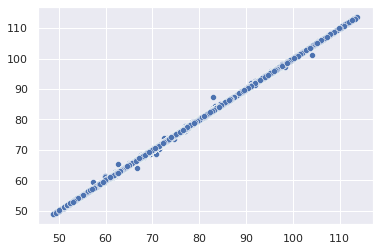

In [60]:
sns.scatterplot(etr[1], dtr[1])

In [6]:
X_train_1 = pd.concat([pd.DataFrame(svm[0]), pd.DataFrame(dtr[0]), pd.DataFrame(etr[0]), pd.DataFrame(rfr[0])], 
               axis=1, ignore_index=True)
X_train_1.columns = ['SVM', 'DT', 'ET', 'RF']

X_test_1 = pd.concat([pd.DataFrame(svm[1]), pd.DataFrame(dtr[1]), pd.DataFrame(etr[1]), pd.DataFrame(rfr[1])], 
               axis=1, ignore_index=True)
X_test_1.columns = ['SVM', 'DT', 'ET', 'RF']

In [7]:
X_train_1

,SVM,DT,ET,RF
0,69.535525,69.499952,69.499952,69.492390
1,64.207619,64.362858,64.362950,64.363996
2,67.501814,67.450275,67.450122,67.449939
3,68.647638,68.809562,68.809562,68.811201
4,74.643672,74.565728,74.565723,74.566641
...,...,...,...,...
369284,83.532722,83.384640,83.384875,83.384526
369285,61.184053,61.314243,61.314243,61.315987
369286,59.288429,59.028594,59.028592,59.025671
369287,76.077065,75.978506,75.978614,75.977573


In [79]:
y_train

0         69.499952
1         64.363150
2         67.450066
3         68.809562
4         74.565728
            ...    
369284    83.384647
369285    61.314243
369286    59.028594
369287    75.978628
369288    74.197905
Name: HR, Length: 369289, dtype: float64

In [89]:
from scipy.stats.mstats import gmean, hmean
print(mean_absolute_error(y_train, hmean(X_train_1[['DT','ET','RF']], axis = 1)))


0.0007528552712225292


In [90]:
y_test_predict = hmean(X_test_1[['DT','ET','RF']], axis = 1)

df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['uuid','HR']
df.to_csv('Submission.csv', index=False)


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
cols = ['SVM', 'DT', 'ET', 'RF']

X_train_1[cols] = scaler.fit_transform(X_train_1[cols])
X_test_1[cols] = scaler.transform(X_test_1[cols])


In [9]:
X_train_1

,SVM,DT,ET,RF
0,-0.421539,-0.429688,-0.429688,-0.430416
1,-0.936385,-0.926628,-0.926620,-0.926519
2,-0.618061,-0.627965,-0.627980,-0.627996
3,-0.507337,-0.496473,-0.496473,-0.496312
4,0.072071,0.060354,0.060353,0.060449
...,...,...,...,...
369284,0.931036,0.913458,0.913481,0.913460
369285,-1.228558,-1.221539,-1.221539,-1.221373
369286,-1.411735,-1.442643,-1.442643,-1.442930
369287,0.210582,0.197020,0.197030,0.196938


In [123]:
!pip install xgboost

In [40]:
! pip install lightgbm

In [56]:
! pip install catboost

     |████████████████████████████████| 66.3MB 51kB/s 


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()

model.fit(X_train_1, y_train)

y_test_predict = model.predict(X_test_1)
y_train_predict = model.predict(X_train_1)



In [58]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_train_predict))

0.0570257921555423


In [59]:
from sklearn.ensemble import StackingRegressor

model = StackingRegressor([
          ('catReg', CatBoostRegressor()),
          ('ligReg', LGBMRegressor())
])

model.fit(X_train_1, y_train)

y_test_predict = model.predict(X_test_1)
y_train_predict = model.predict(X_train_1)

print(mean_absolute_error(y_train, y_train_predict))

0.049263646918843766


In [60]:
y_test_predict

array([64.67244512, 73.80993074, 69.2330835 , ..., 60.91170026,
       77.40566113, 76.60338533])

In [39]:
df = pd.concat([pd.DataFrame(y_id),pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)
df.columns = ['uuid','HR']
df.to_csv('Submission.csv', index=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


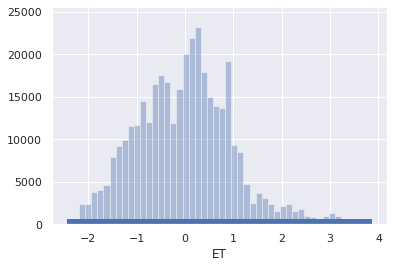

In [35]:
sns.distplot(X_train_1['ET'], kde=False, rug=True)